In [1]:
import sys
from ReST import ReST
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## CASE 1: MELANOMA SAMPLE with CSV data type

In [2]:
## Load the data with a CSV input type, index is the XxY coordinate, columns are the gene symbols
## This block generate:
### a CPM normalized expression data, 
### a observation data frame contains the X, Y coordinates,
### a var data frame contains the meta information of the genes
## The abovementioned three inputs will be used to generate a ReST object

df = pd.read_csv("test_data/raw.csv", index_col=0)
df.columns = [c.split()[0] for c in df.columns]
xs, ys = [],[]
for ind in df.index.tolist():
    xs.append(int(ind.split('x')[0]))
    ys.append(int(ind.split('x')[1]))
meta_df = pd.DataFrame({'array_col': xs, "array_row": ys}, index = df.index)
gene_df = pd.DataFrame({'gene': df.columns.tolist()}, index=df.columns)

In [3]:
## Data construction, QC, and preprocessing
rd = ReST(counts=df, coordinates=meta_df, gene_df=gene_df)
rd.preprocess(species='Human', hvg_prop=0.8, n_pcs=10, filter_spot=True)

Before QC: 293 observations and 16148 genes.


OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Filtering spots with less than 1500 UMIs.
After QC: 269 observations and 10975 genes.


MIST Data created in 0.55 seconds.


100%|█████████████████████████████████████████████████████████| 41/41 [00:05<00:00,  7.11it/s]


Epsilon 0.740 is selected in 6.09 seconds.


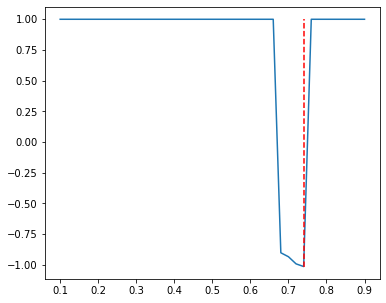

In [4]:
## Region extraction through parameter optimization and graph algorithms
rd.extract_regions(min_sim = 0.1, min_region=20, gap=0.02)

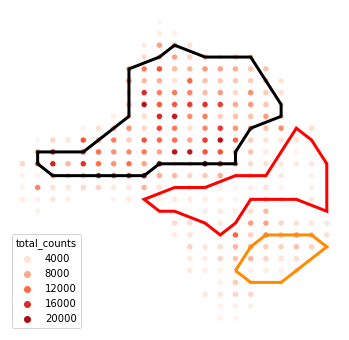

In [6]:
# Plot region boundaries
rd.assign_region_colors(region_colors={'0':'black', '1':'red', '2':'darkorange'})
rd.plot_region_boundaries()

100%|███████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.03s/it]


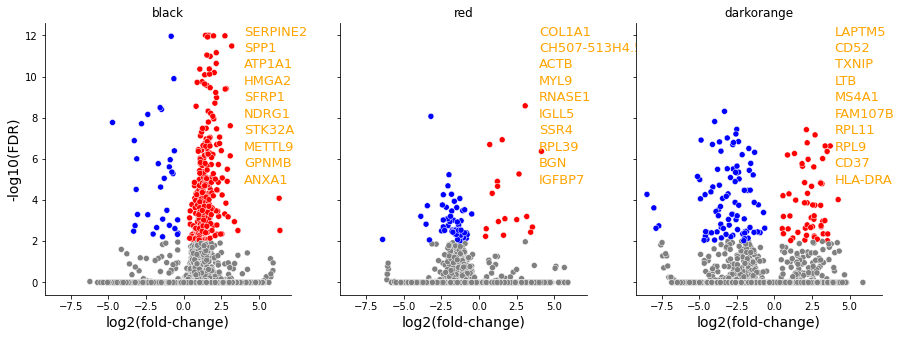

In [7]:
## Functional annotation of the regions
rd.extract_regional_markers(mode='all')
rd.plot_region_volcano()

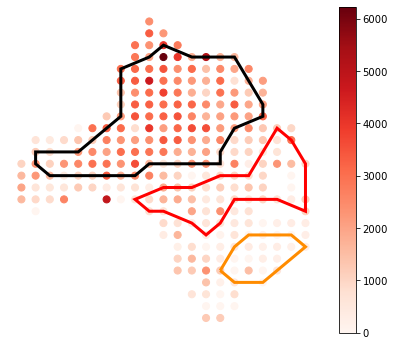

In [8]:
## Visualize gene expression heatmap with the boundaries
gene = 'SERPINE2'
rd.visualize_gene_expr(gene)

In [9]:
rd.runGSEA(mode='all', species='Human', gene_sets="GO_Biological_Process_2021")

Running GSEA on mode all for species Human.


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

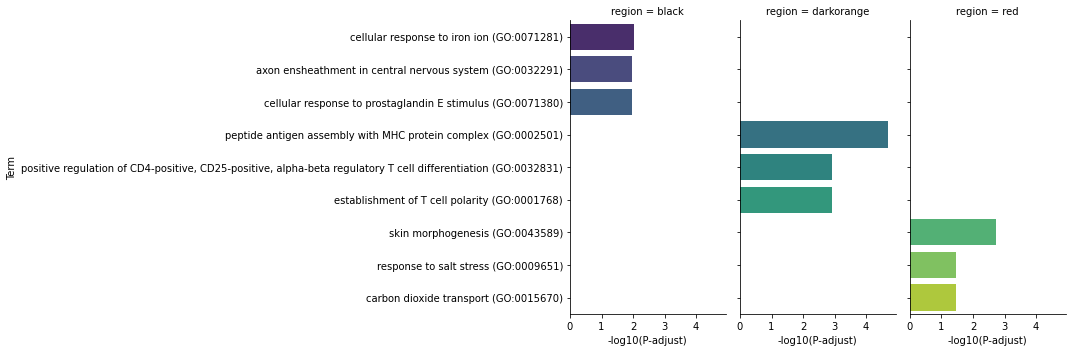

In [10]:
rd.plot_region_enrichment(top=3, flavor='default')

In [10]:
## Run imputation
imputed = rd.impute(method='MIST', ncores=1, nExperts=3)

[Start][Region] 0 / 3 | [Spots] 24 | 24 / 176.
[0 / 0] imputation started with 112 observations and 11001 varaibles.
[0 / 0] imputation completed in 13.1 seconds.
[0 / 1] imputation started with 112 observations and 11001 varaibles.
[0 / 1] imputation completed in 8.5 seconds.
[0 / 2] imputation started with 111 observations and 11001 varaibles.
[0 / 2] imputation completed in 6.7 seconds.
[End][Region] 0 / 3 | [Elapsed] 74.3 seconds.
[Start][Region] 1 / 3 | [Spots] 55 | 79 / 176.
[1 / 0] imputation started with 133 observations and 11001 varaibles.
[1 / 0] imputation completed in 9.4 seconds.
[1 / 1] imputation started with 132 observations and 11001 varaibles.
[1 / 1] imputation completed in 10.6 seconds.
[1 / 2] imputation started with 132 observations and 11001 varaibles.
[1 / 2] imputation completed in 11.3 seconds.
[End][Region] 1 / 3 | [Elapsed] 39.2 seconds.
[Start][Region] 2 / 3 | [Spots] 97 | 176 / 176.
[2 / 0] imputation started with 161 observations and 11001 varaibles.
[2 